In [1]:
import nibabel as nib
from glob import glob
import os

from matplotlib import pyplot as plt
import numpy as np
import cv2

plt.rcParams["figure.figsize"] = (10,10)

In [57]:
def load_lidcset(idx, base_dir = "../data/NII_normwinall"):
    img_lst = sorted(glob(os.path.join(base_dir, "*img.nii.gz")))
    mask_lst = sorted(glob(img_lst[idx].replace("img", "mask*")))
    img = nib.load(img_lst[idx]).get_fdata()
    nod = np.array(nib.load(mask_lst[0]).get_fdata())
    
    return img, nod

def normalize255(arr):
    return np.array(((arr - np.min(arr)) / (np.max(arr) - np.min(arr)))*255).astype(np.uint8)

def subtract_nodule(img, nod):
    return np.where(nod!=0, np.min(img), img)

def make_drr(img):
    return np.mean(img.T, axis=2)

def plot_drr(img):
    plt.imshow(make_drr(img), cmap='gray')
    
def plot_overlay(background, foreground, alpha=0.7, cmap_1='gray', cmap_2='jet'):
    a1 = plt.subplot(1, 1, 1)
    plt.imshow(np.mean(background.T, axis=2), cmap=cmap_1)
    plt.imshow(np.mean(foreground.T, axis=2), cmap=cmap_2, alpha=alpha)
#     a1.axis('off')
    plt.show()
    
def plot_contour (background, foreground, colour=(255, 0, 0), thickness=1):
    
    background = normalize255(np.mean(background.T, axis=2))
    foreground = foreground > 6
    foreground = np.array(np.max(foreground.T, axis=2)*255).astype(np.uint8)
    
    contours, _ = cv2.findContours(foreground, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

    background = cv2.cvtColor(np.float32(background), cv2.COLOR_GRAY2RGB)
    
    for c in contours:
        cv2.drawContours(background,[c],-1,colour,thickness)

    a1 = plt.subplot(1, 1, 1)
    plt.imshow(background.astype(np.uint8))
#     a1.axis('off')
    plt.show()

In [24]:
img, nod = load_lidcset(0, base_dir="../data/NII_normwinall")
img = np.uint8(img)
nod = np.uint8(nod)

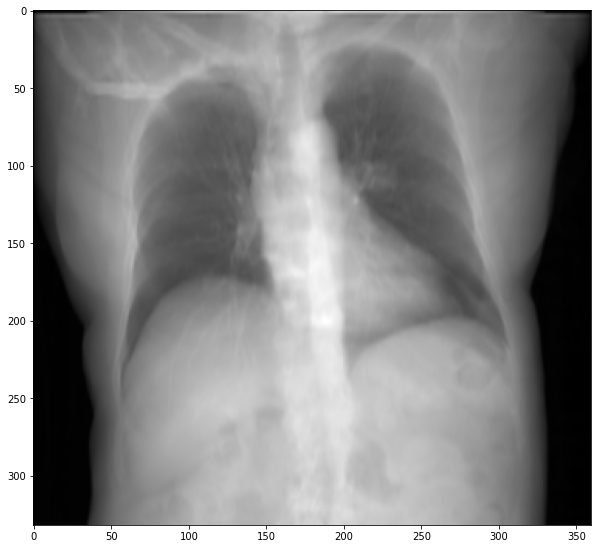

In [25]:
plot_drr(img)

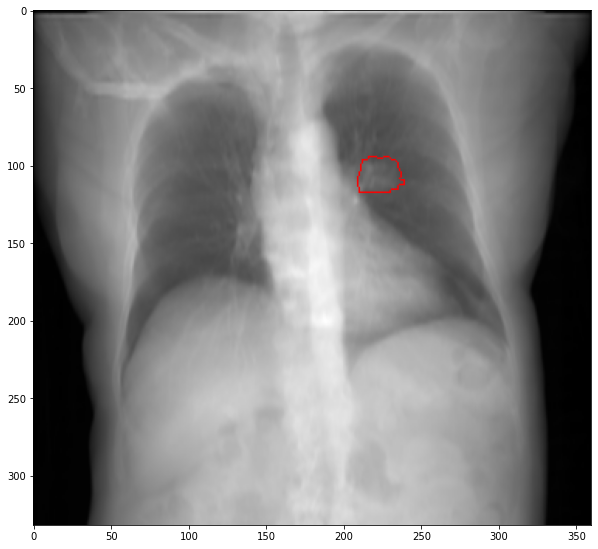

In [28]:
plot_contour(img, nod)

In [31]:
img[:, :, 105]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

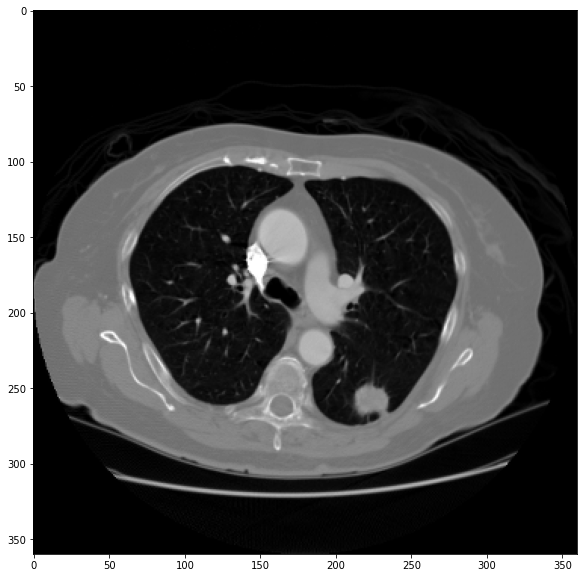

In [29]:
plt.imshow(img[:, :, 105], cmap='gray')

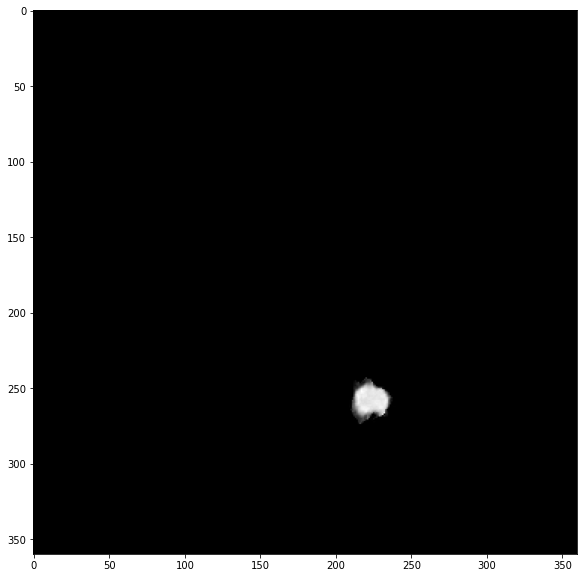

In [30]:
plt.imshow(nod[:, :, 105], cmap='gray')

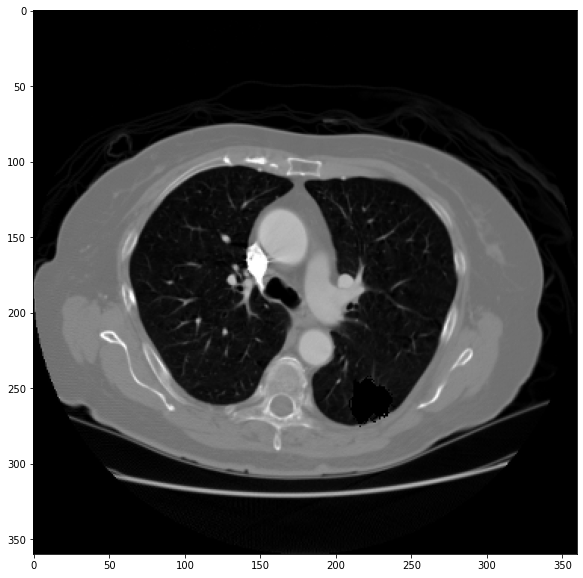

In [18]:
plt.imshow(subtract_nodule(img, nod)[:, :, 105], cmap='gray')

In [36]:
nod_pos = np.where(nod !=0)

In [37]:
nod_only = nod[min(nod_pos[0]):max(nod_pos[0]), min(nod_pos[1]):max(nod_pos[1]), min(nod_pos[2]):max(nod_pos[2])]

In [38]:
nod_only.shape

(36, 33, 33)

In [39]:
nod_only.shape[-1]//2

16

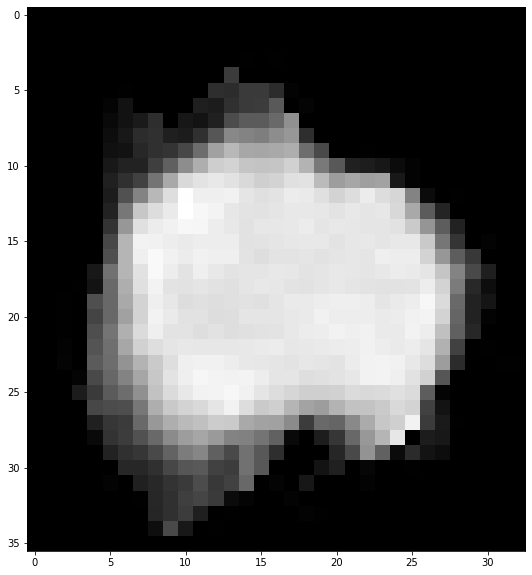

In [40]:
plt.imshow(nod_only[:, :, nod_only.shape[-1]//2], cmap='gray')

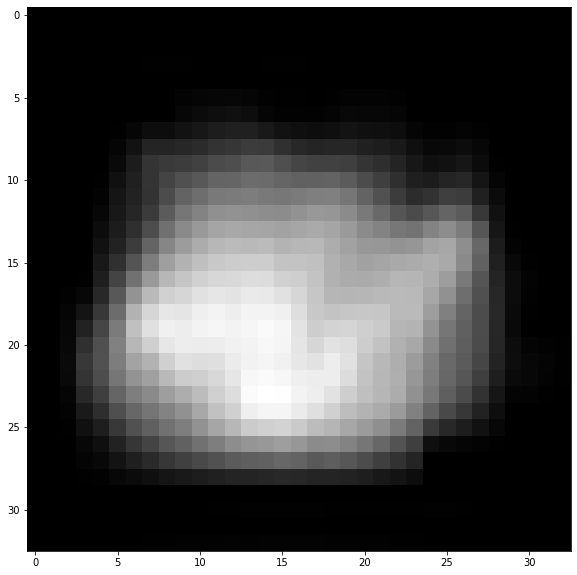

In [41]:
plot_drr(nod_only)

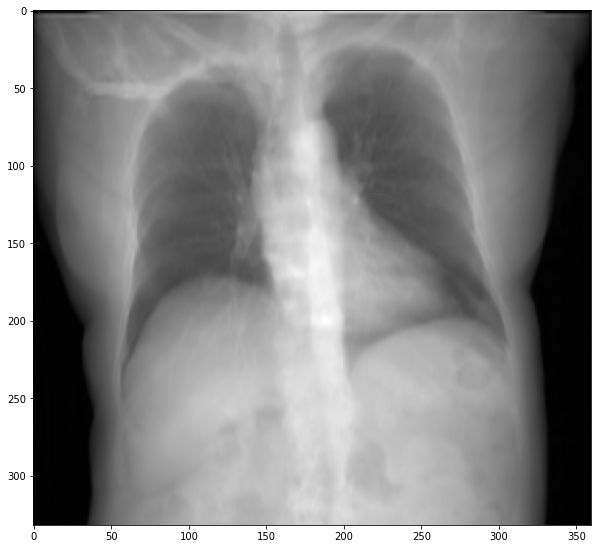

In [42]:
plot_drr(subtract_nodule(img, nod))

In [45]:
img_lst = sorted(glob(os.path.join("../data/NII_normwinall", "*img.nii.gz")))

In [46]:
img_lst

['NII_normwinall/LIDC-IDRI-0001_01-01-2000-NA-NA-30178_3000566.000000-NA-03192_img.nii.gz',
 'NII_normwinall/LIDC-IDRI-0002_01-01-2000-NA-NA-98329_3000522.000000-NA-04919_img.nii.gz',
 'NII_normwinall/LIDC-IDRI-0003_01-01-2000-NA-NA-94866_3000611.000000-NA-03264_img.nii.gz',
 'NII_normwinall/LIDC-IDRI-0004_01-01-2000-NA-NA-91780_3000534.000000-NA-58228_img.nii.gz',
 'NII_normwinall/LIDC-IDRI-0005_01-01-2000-NA-NA-42125_3000548.000000-NA-86225_img.nii.gz',
 'NII_normwinall/LIDC-IDRI-0006_01-01-2000-NA-NA-92500_3000556.000000-NA-20957_img.nii.gz',
 'NII_normwinall/LIDC-IDRI-0007_01-01-2000-NA-NA-81781_3000631.000000-NA-57680_img.nii.gz',
 'NII_normwinall/LIDC-IDRI-0008_01-01-2000-NA-NA-30141_3000549.000000-NA-21954_img.nii.gz',
 'NII_normwinall/LIDC-IDRI-0009_01-01-2000-NA-NA-07045_3000538.000000-NA-29210_img.nii.gz',
 'NII_normwinall/LIDC-IDRI-0010_01-01-2000-NA-NA-43375_3000518.000000-NA-66796_img.nii.gz',
 'NII_normwinall/LIDC-IDRI-0011_01-01-2000-NA-NA-73568_3000559.000000-NA-23138_i

In [52]:
mask_lst = sorted(glob(img_lst[1].replace("img", "mask*")))

In [58]:
img_1, mask_1 = load_lidcset(1)

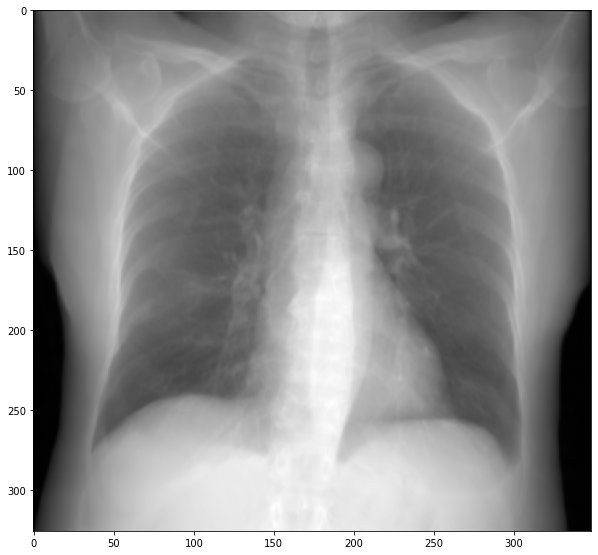

In [59]:
plot_drr(img_1)

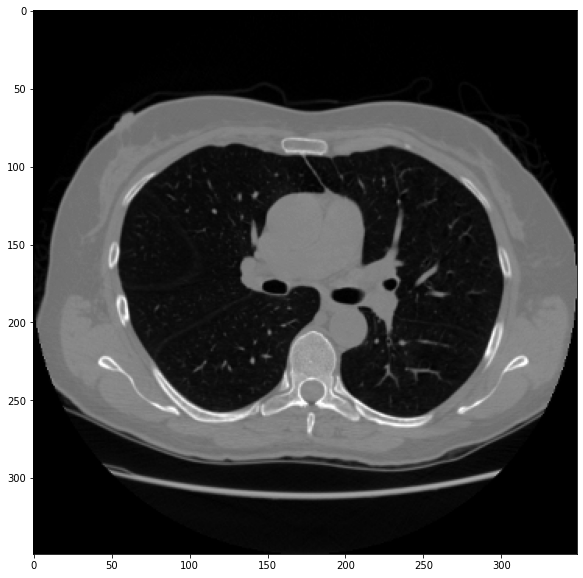

In [63]:
plt.imshow(img_1[:, :, location[-1]+nod_only.shape[-1]//2], cmap='gray')

In [61]:
def nod_img(img, nod, location):
    nod_img = img.copy()
    mask = np.zeros(nod_img.shape)
    
    ns = nod.shape
    mask[location[0]:location[0]+ns[0], location[1]:location[1]+ns[1], location[2]:location[2]+ns[2]] = nod
    
    nod_img = np.where(mask!=0, mask, img)
    
    return nod_img, mask

In [62]:
location = [210, 220, 130]

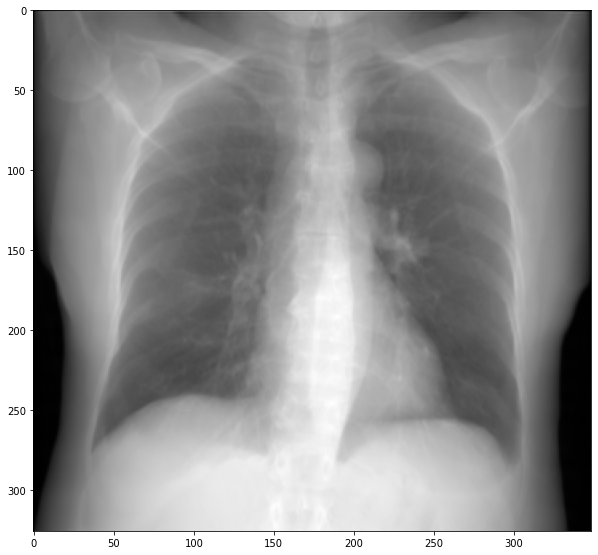

In [64]:
nod_img_1, nod_img_1_mask = nod_img(img_1, nod_only, location)
plot_drr(nod_img_1)

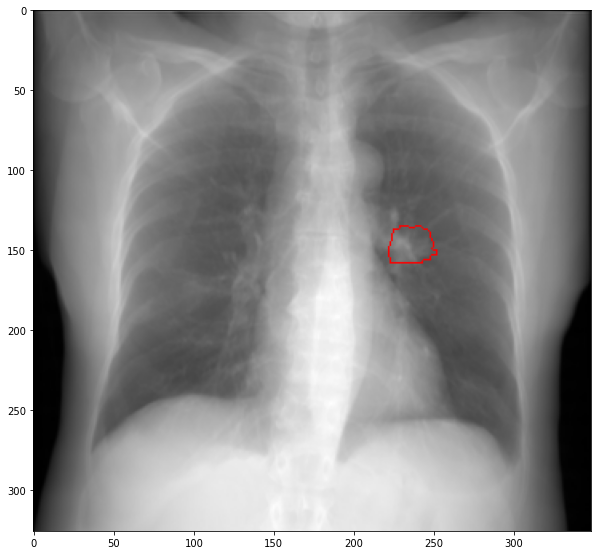

In [65]:
plot_contour(nod_img_1, nod_img_1_mask)

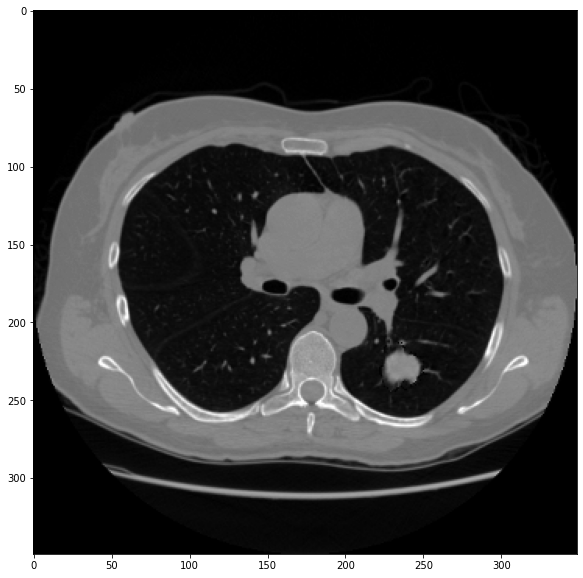

In [66]:
plt.imshow(nod_img_1[:, :, location[-1]+nod_only.shape[-1]//2], cmap='gray')

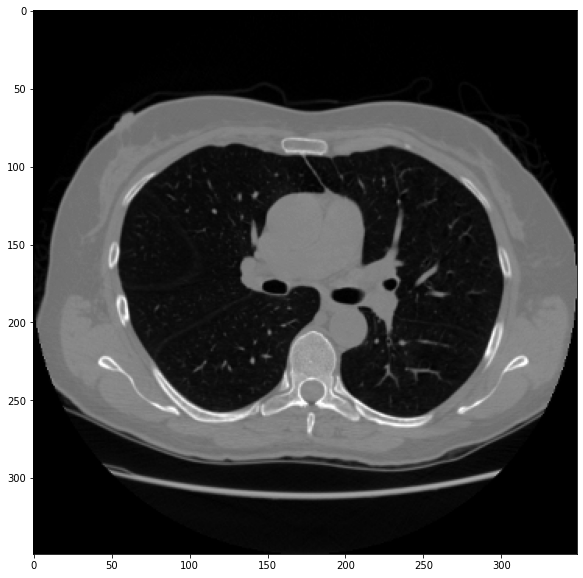

In [67]:
plt.imshow(img_1[:, :, location[-1]+nod_only.shape[-1]//2], cmap='gray')